In [1]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
# Read the wrangled csv file as dataframe: titles_crew_pre
titles_crew_pre=pd.read_csv('title.csv').drop(['Unnamed: 0'],axis=1)
titles_crew_pre.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,title,region,language,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack"
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer"
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous"
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer"


In [3]:
titles_crew_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404715 entries, 0 to 404714
Data columns (total 18 columns):
tconst               404715 non-null object
titleType            404715 non-null object
primaryTitle         404715 non-null object
originalTitle        404715 non-null object
startYear            404715 non-null int64
runtimeMinutes       371526 non-null float64
genres               395421 non-null object
title                404715 non-null object
region               404715 non-null object
language             2295 non-null object
averageRating        404715 non-null float64
numVotes             404715 non-null int64
nconst               404715 non-null object
category             404715 non-null object
primaryName          404672 non-null object
birthYear            155636 non-null float64
deathYear            20124 non-null float64
primaryProfession    391396 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 55.6+ MB


In [4]:
# Create a new dataset from titles containing single row for each movie title: t
t=titles_crew_pre.iloc[:,[0,4,5,6,10,11]].drop_duplicates()

# Add a column for rounded value of average rating for each movie
t['roundRating']=t['averageRating'].round() 
t.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,72374,6.0
10,tt0059900,1990,78.0,"Drama,Fantasy",6.8,21,7.0
20,tt0064820,1989,81.0,Comedy,6.9,266,7.0
29,tt0067100,1981,77.0,"Action,Drama,Thriller",5.7,364,6.0
39,tt0067460,1985,85.0,"Documentary,Sport",8.1,10,8.0


In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46275 entries, 0 to 404708
Data columns (total 7 columns):
tconst            46275 non-null object
startYear         46275 non-null int64
runtimeMinutes    42171 non-null float64
genres            45014 non-null object
averageRating     46275 non-null float64
numVotes          46275 non-null int64
roundRating       46275 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ MB


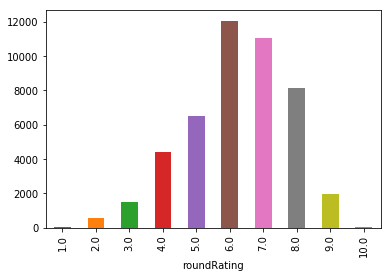

In [6]:
# Plot a graph of ratings for all the movies for all years under consideration
t.groupby('roundRating')['tconst'].count().plot(kind='bar')

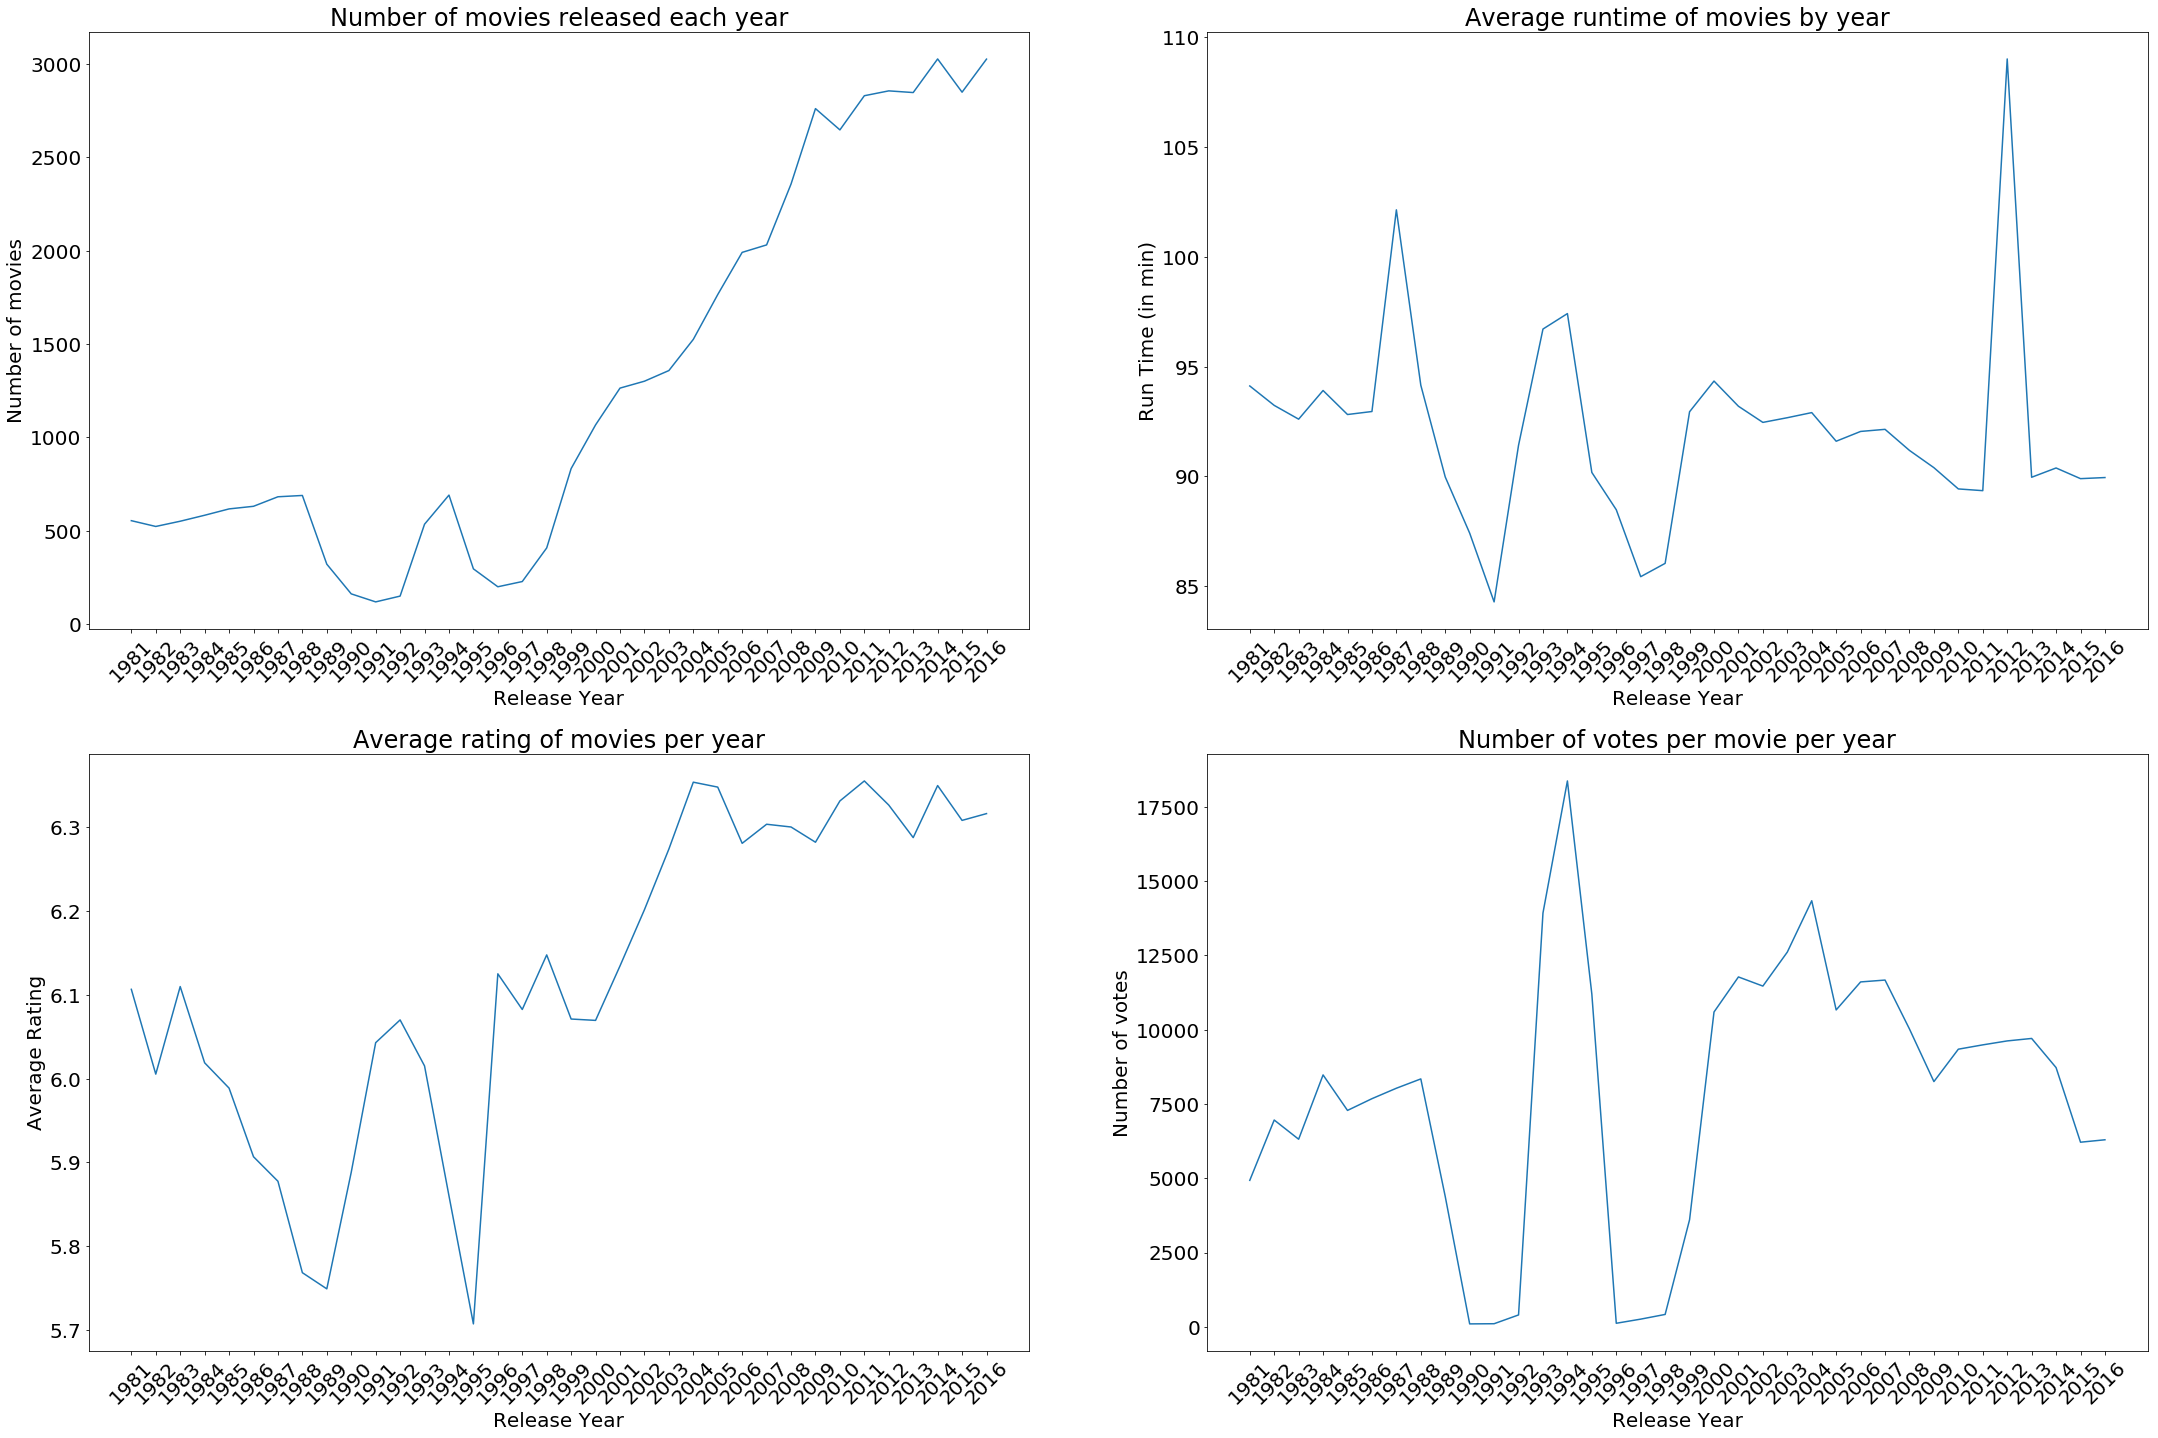

In [7]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 20})

plt.subplot(2,2,2)
t.groupby('startYear')['runtimeMinutes'].mean().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year')

plt.subplot(2,2,1)
t.groupby('startYear')['tconst'].count().plot()
plt.xlabel('Release Year')
plt.ylabel('Number of movies')
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year')

plt.subplot(2,2,3)
t.groupby('startYear')['averageRating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year')

plt.subplot(2,2,4)
t.groupby('startYear')['numVotes'].mean().plot()
plt.xlabel('Release Year')
plt.ylabel('Number of votes')
plt.title('Number of votes per movie per year')
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)



In [8]:
# Calculate number of movies (cumulative) against number of votes
t[t.numVotes<=20].groupby('numVotes')['tconst'].count().cumsum()

numVotes
5      1368
6      2815
7      4067
8      5186
9      6163
10     7060
11     7901
12     8689
13     9385
14    10049
15    10637
16    11228
17    11754
18    12214
19    12669
20    13093
Name: tconst, dtype: int64

Text(0.5,1,'Max runtime of movies by year')

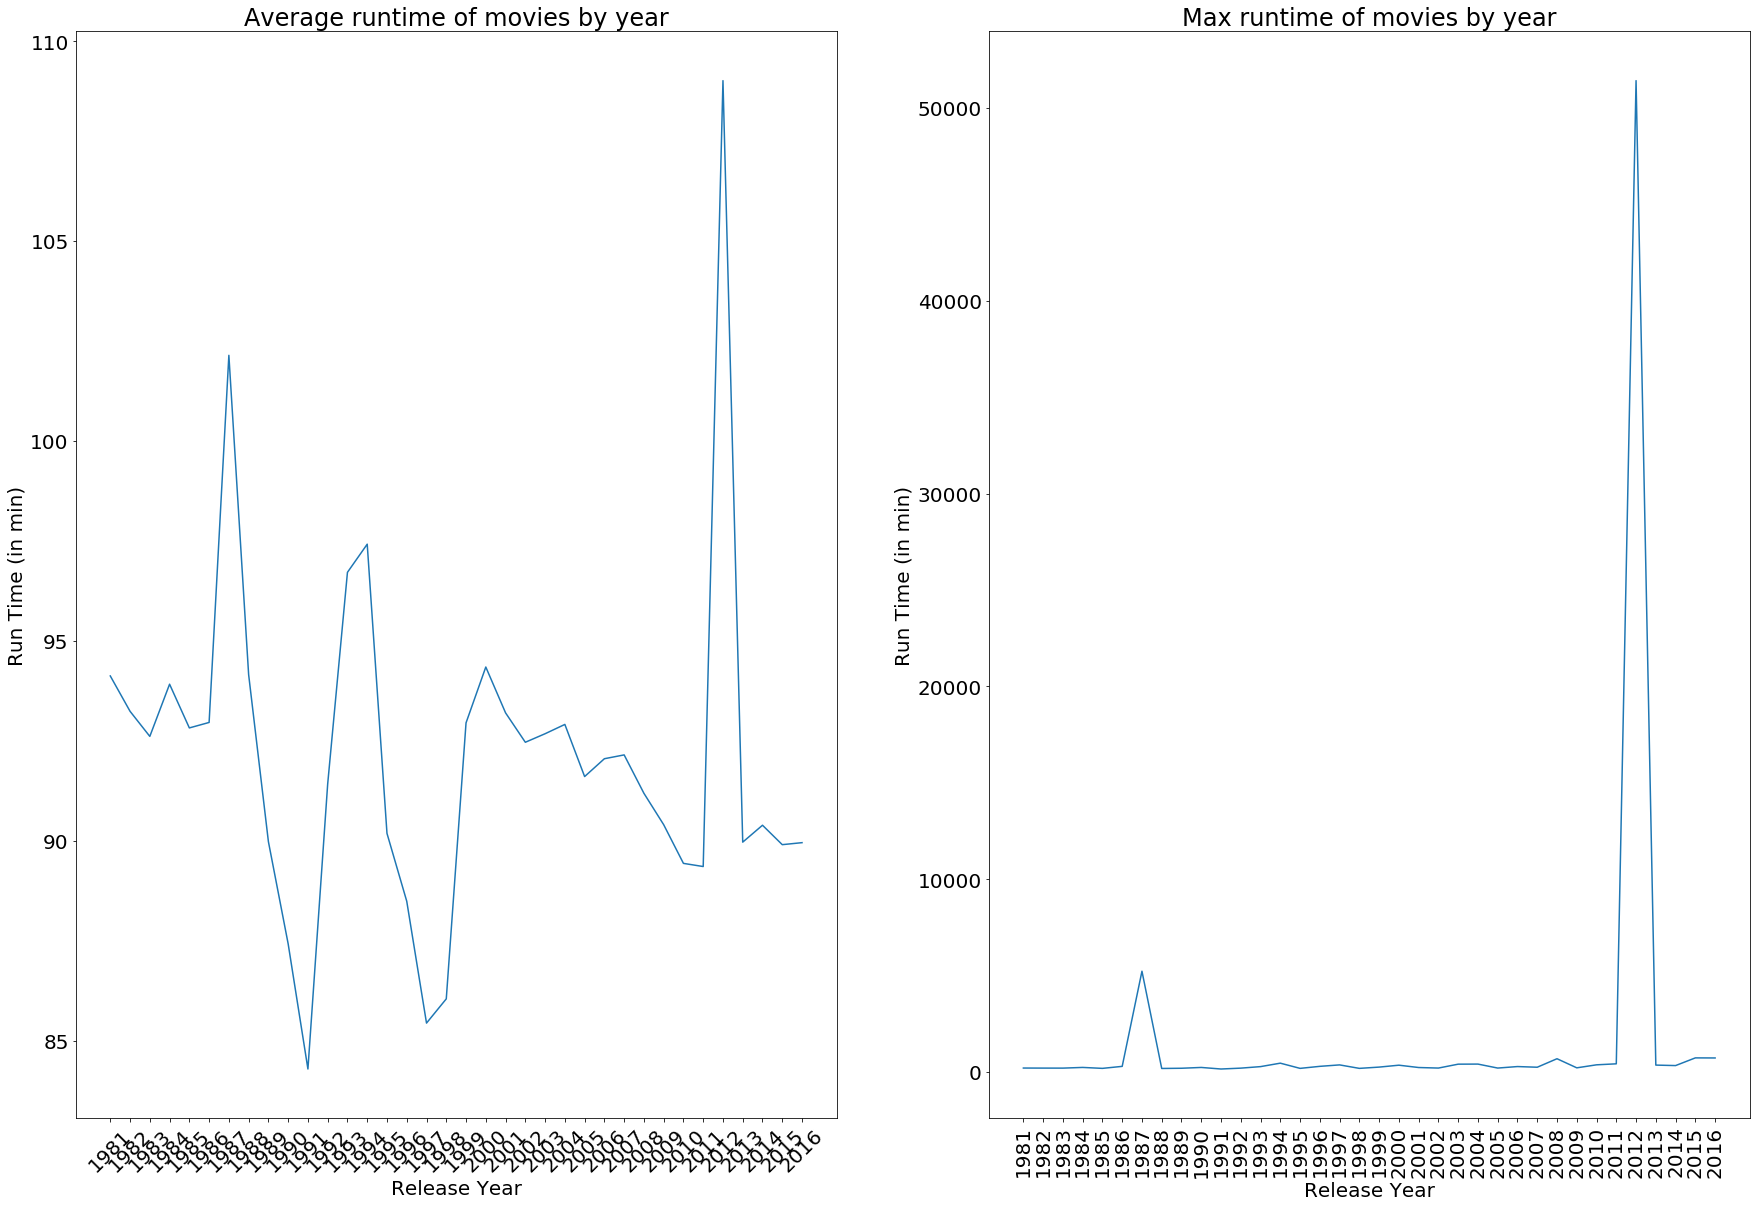

In [9]:
# Trend of Maximum runtime of movies 

plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
t.groupby('startYear')['runtimeMinutes'].mean().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year')

plt.subplot(1,2,2)
t.groupby('startYear')['runtimeMinutes'].max().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(t['startYear']), max(t['startYear'])+1, 1.0),rotation=90)
plt.title('Max runtime of movies by year')

In [10]:
# Due to variability in data before 1999, only titles released after 1999 are to be considered

#Filtering out data after 1999: titles_crew
titles_crew=titles_crew_pre[titles_crew_pre.startYear>=1999]

# Drop rows with number of votes less than or equal to 10 and runtime minutes more than 240
titles_crew=titles_crew.drop((titles_crew[(titles_crew.numVotes<=10) | (titles_crew.runtimeMinutes>240)]).index).reset_index(drop=True)
titles_crew.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,title,region,language,averageRating,numVotes,nconst,category,primaryName,birthYear,deathYear,primaryProfession
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0107463,editor,David Brenner,NaN,NaN,"editor,editorial_department"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0000212,actress,Meg Ryan,1961.0,NaN,"actress,producer,soundtrack"
2,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0413168,actor,Hugh Jackman,1968.0,NaN,"actor,soundtrack,producer"
3,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0000630,actor,Liev Schreiber,1967.0,NaN,"actor,producer,miscellaneous"
4,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",Kate and Leopold,US,NaN,6.4,72374,nm0005227,actor,Breckin Meyer,1974.0,NaN,"actor,writer,producer"


In [11]:
titles_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286930 entries, 0 to 286929
Data columns (total 18 columns):
tconst               286930 non-null object
titleType            286930 non-null object
primaryTitle         286930 non-null object
originalTitle        286930 non-null object
startYear            286930 non-null int64
runtimeMinutes       268583 non-null float64
genres               282932 non-null object
title                286930 non-null object
region               286930 non-null object
language             1944 non-null object
averageRating        286930 non-null float64
numVotes             286930 non-null int64
nconst               286930 non-null object
category             286930 non-null object
primaryName          286906 non-null object
birthYear            106987 non-null float64
deathYear            7119 non-null float64
primaryProfession    277201 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 39.4+ MB


In [12]:
# Create a new dataset from titles containing single row for each movie title: titles

titles=titles_crew.iloc[:,[0,4,5,6,10,11]].drop_duplicates().reset_index(drop=True)
titles['roundRating']=titles['averageRating'].round() 
titles.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,roundRating
0,tt0035423,2001,118.0,"Comedy,Fantasy,Romance",6.4,72374,6.0
1,tt0088751,2005,100.0,"Comedy,Horror,Sci-Fi",5.8,179,6.0
2,tt0094859,2016,74.0,Comedy,7.8,55,8.0
3,tt0108549,2004,96.0,"Comedy,Mystery",7.7,23,8.0
4,tt0111068,1999,127.0,"Action,Drama,Thriller",7.2,4677,7.0


In [13]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32197 entries, 0 to 32196
Data columns (total 7 columns):
tconst            32197 non-null object
startYear         32197 non-null int64
runtimeMinutes    30043 non-null float64
genres            31702 non-null object
averageRating     32197 non-null float64
numVotes          32197 non-null int64
roundRating       32197 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


Text(0.5,1,'Ratings distribution')

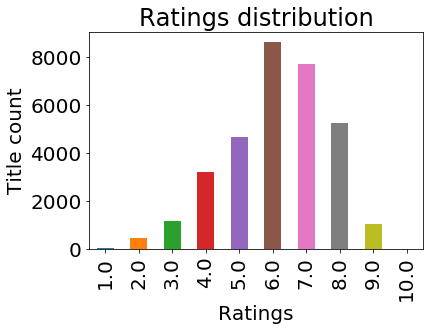

In [14]:
# Plot a graph of ratings for all the movies for all years under consideration

titles.groupby('roundRating')['tconst'].count().plot(kind='bar')
plt.ylabel('Title count')
plt.xlabel('Ratings')
plt.title('Ratings distribution')

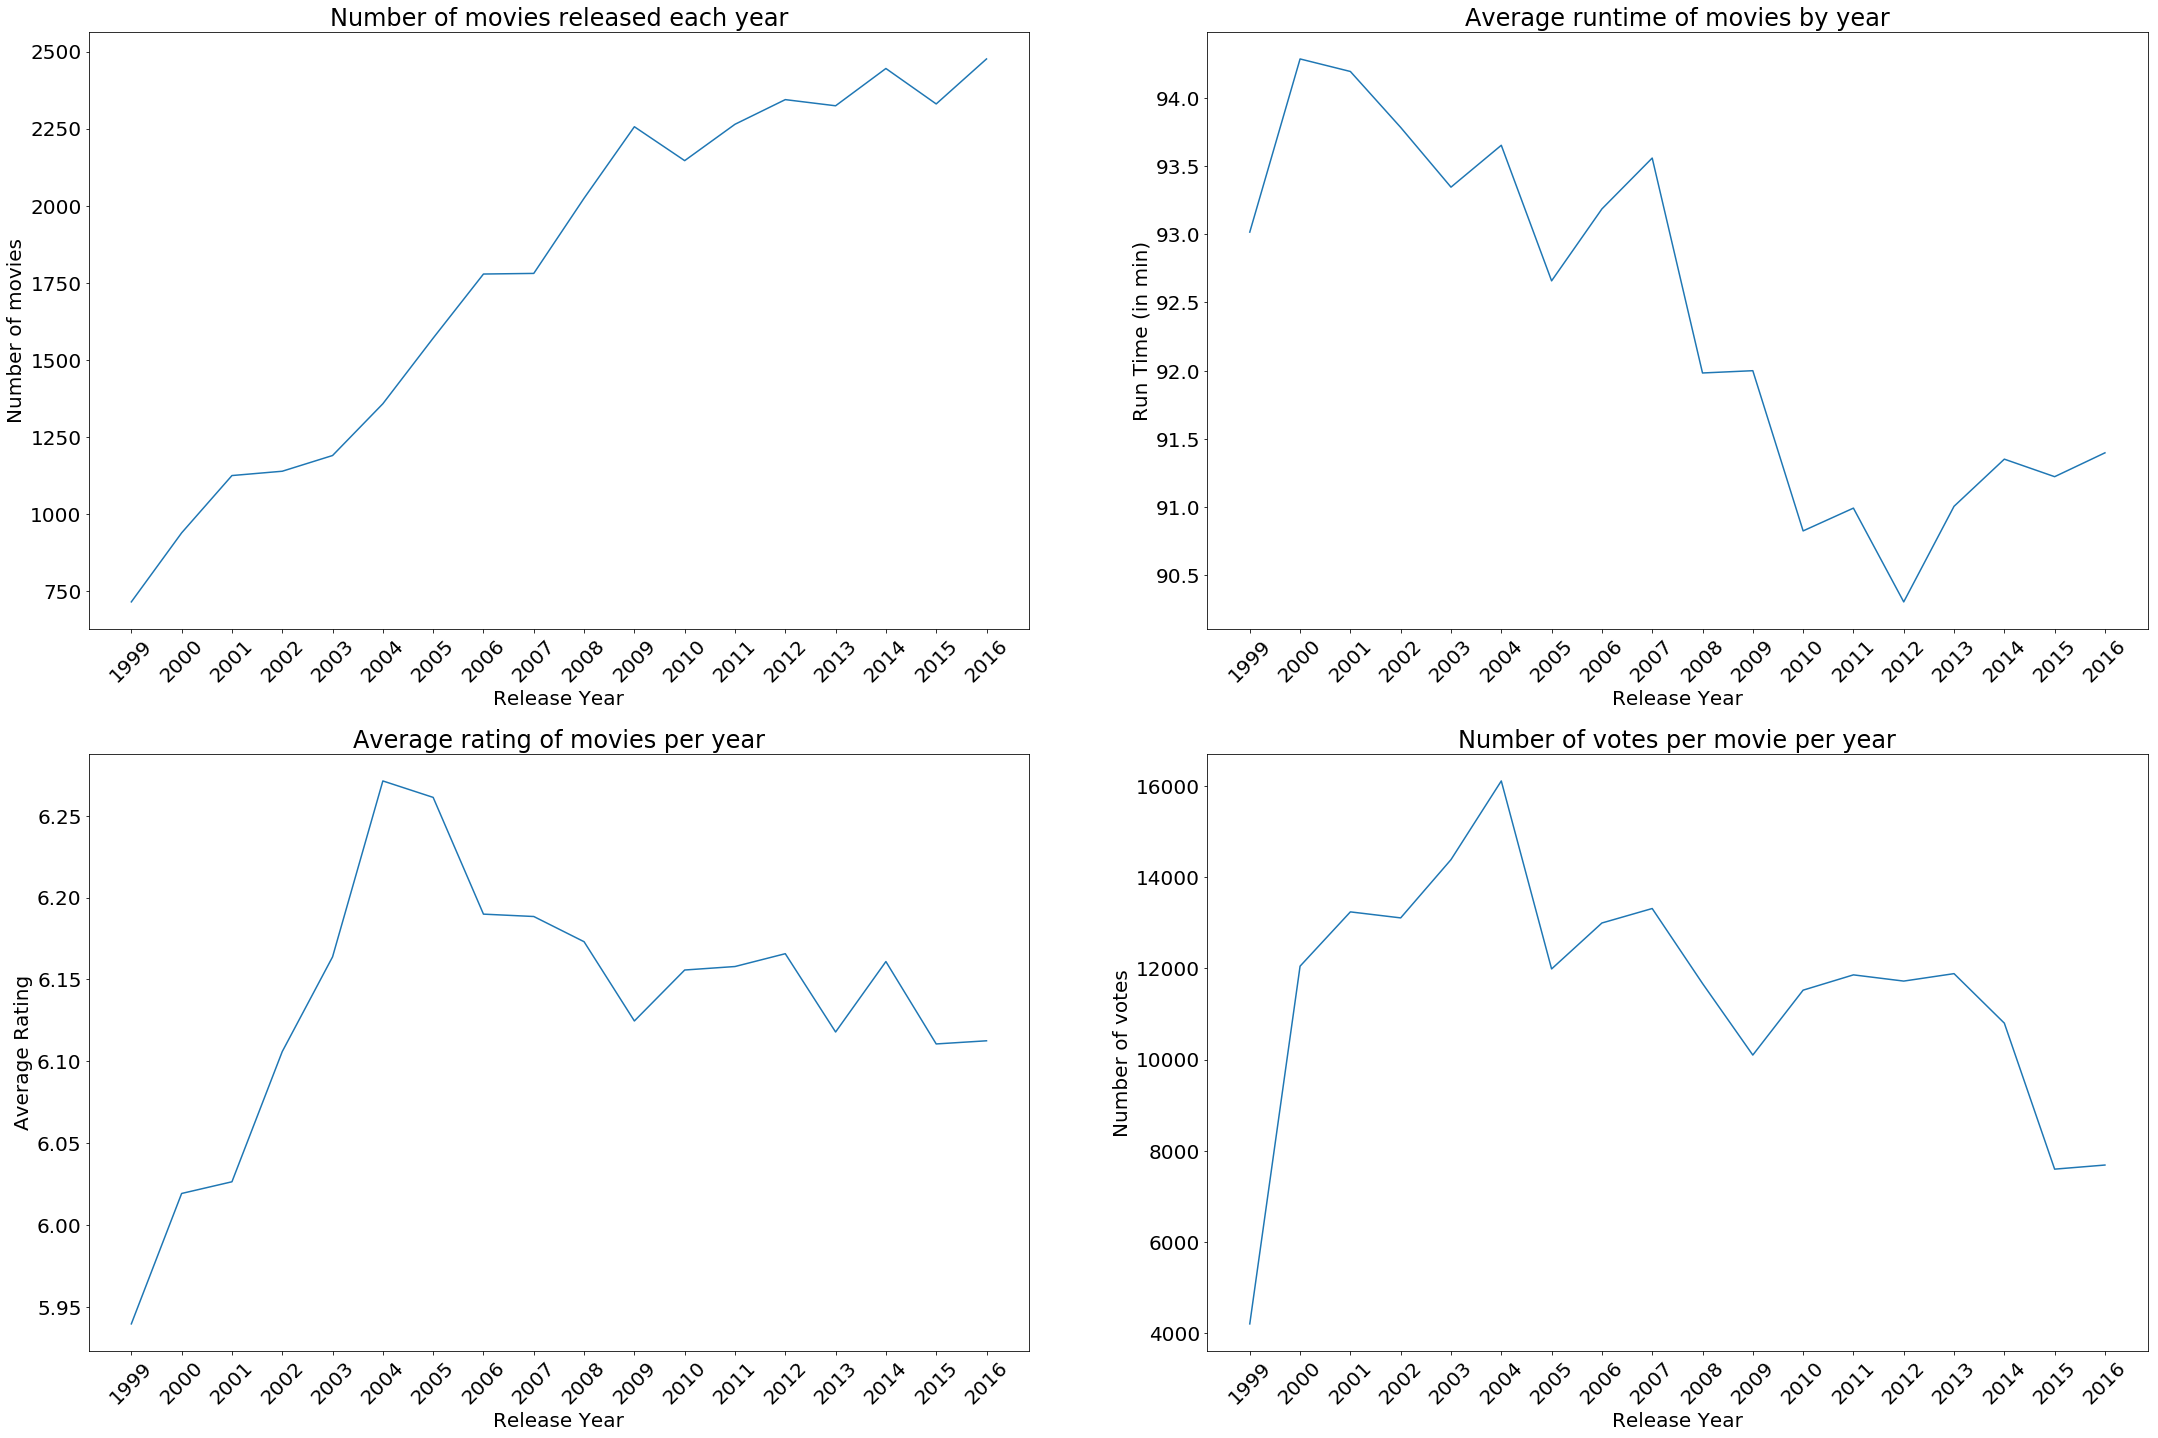

In [15]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 20})

plt.subplot(2,2,2)
titles.groupby('startYear')['runtimeMinutes'].mean().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year')

plt.subplot(2,2,1)
titles.groupby('startYear')['tconst'].count().plot()
plt.xlabel('Release Year')
plt.ylabel('Number of movies')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year')

plt.subplot(2,2,3)
titles.groupby('startYear')['averageRating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year')

plt.subplot(2,2,4)
titles.groupby('startYear')['numVotes'].mean().plot()
plt.xlabel('Release Year')
plt.ylabel('Number of votes')
plt.title('Number of votes per movie per year')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)


Text(0,0.5,'Average Rating')

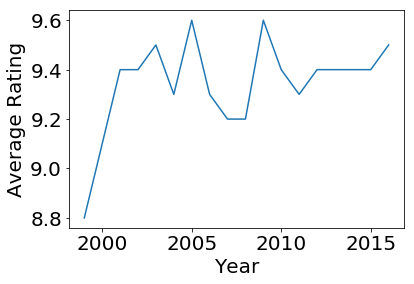

In [16]:
titles.groupby('startYear')['averageRating'].max().plot()
plt.xlabel('Year')
plt.ylabel('Average Rating')

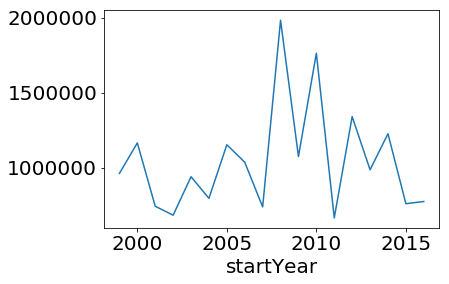

In [17]:
titles.groupby('startYear')['numVotes'].max().plot()

Text(0.5,1,'Max runtime of movies by year')

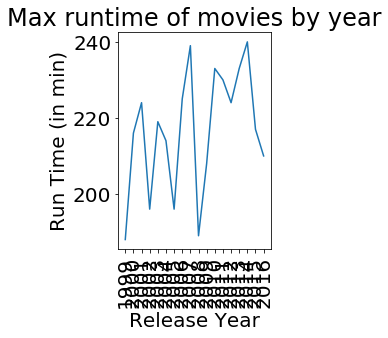

In [18]:
plt.subplot(1,2,2)
titles.groupby('startYear')['runtimeMinutes'].max().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(titles['startYear']), max(titles['startYear'])+1, 1.0),rotation=90)
plt.title('Max runtime of movies by year')

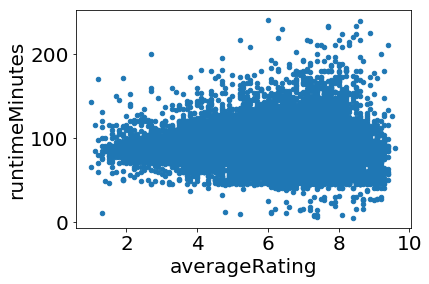

In [19]:
titles.plot(x='averageRating', y='runtimeMinutes',kind='scatter')

In [20]:
#releaseDt=[]
#boxOffice=[]
#for a in b['tconst']:
#    url='http://www.omdbapi.com/?apikey=ff21610b&i='+a
#    r=requests.get(url)
#    json_data= r.json()
#    releaseDt.append(json_data['Released'])
#    boxOffice.append(json_data['BoxOffice'])
#b['releaseDt']=releaseDt
#b['boxOffice']=boxOffice

In [21]:
# releaseDt=[]
# boxOffice=[]
# for a in titles['tconst']:
#     url='http://www.omdbapi.com/?apikey=ff21610b&i='+a
#     r=requests.get(url)
#     json_data= r.json()
#     releaseDt.append(json_data['Released'])
#     boxOffice.append(json_data['BoxOffice'])
# titles['releaseDt']=releaseDt
# titles['boxOffice']=boxOffice